# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99808., 100204.,  99991.,  99926., 100059., 100252.,  99896.,
        100038., 100021.,  99805.]),
 array([ 1.00002393, 10.90001876, 20.80001358, 30.7000084 , 40.60000323,
        50.49999805, 60.39999288, 70.2999877 , 80.19998253, 90.09997735,
        99.99997218]),
 <BarContainer object of 10 artists>)

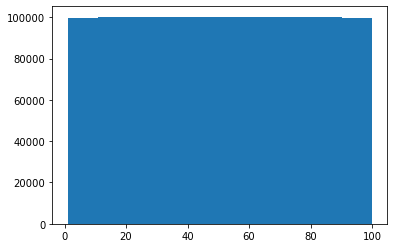

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

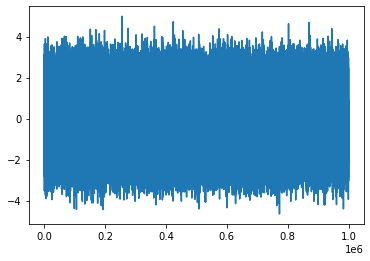

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.12000e+02, 3.13900e+03, 3.59240e+04, 1.75008e+05, 3.54302e+05,
        3.03697e+05, 1.10087e+05, 1.66340e+04, 1.07500e+03, 2.20000e+01]),
 array([-4.65424335, -3.68928272, -2.72432208, -1.75936145, -0.79440082,
         0.17055982,  1.13552045,  2.10048108,  3.06544171,  4.03040235,
         4.99536298]),
 <BarContainer object of 10 artists>)

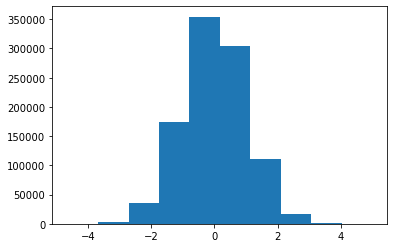

In [6]:
%matplotlib inline
plt.hist(data)

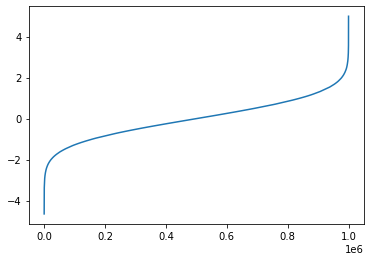

In [7]:
plt.plot(x,sorted(data))

(array([  38.,  215.,  807., 1921., 2814., 2407., 1303.,  394.,   93.,
           8.]),
 array([-2.9816515 , -1.18856641,  0.60451869,  2.39760378,  4.19068888,
         5.98377397,  7.77685907,  9.56994416, 11.36302926, 13.15611435,
        14.94919945]),
 <BarContainer object of 10 artists>)

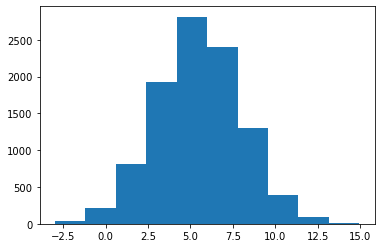

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.83468376,  0.50635344,  0.18127912,  0.90066609],
       [-0.12365903,  0.15675744, -2.90396065, -0.46249821]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1438579999999985


(3.1438579999999985, [<matplotlib.lines.Line2D at 0x7f5b5cb53e90>])

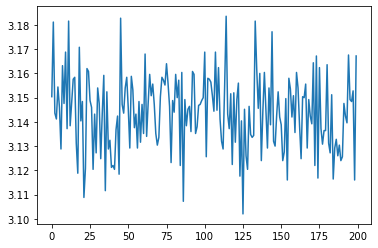

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001898,1.501353,18.504928
std,0.999415,2.499022,7.789560
min,-4.985115,-11.693491,5.000017
25%,-0.671132,-0.185421,11.765454
50%,0.001093,1.500236,18.499800
75%,0.675118,3.190252,25.250193
max,4.804455,13.313888,31.999968


(array([2.80000e+01, 1.23300e+03, 1.87660e+04, 1.21885e+05, 3.21258e+05,
        3.49686e+05, 1.55919e+05, 2.89300e+04, 2.23500e+03, 6.00000e+01]),
 array([-4.98511477, -4.00615781, -3.02720086, -2.0482439 , -1.06928694,
        -0.09032999,  0.88862697,  1.86758392,  2.84654088,  3.82549784,
         4.80445479]),
 <BarContainer object of 10 artists>)

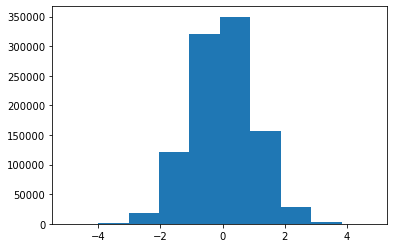

In [14]:
plt.hist(data["A"])

(array([1.00000e+01, 4.86000e+02, 1.06810e+04, 8.96280e+04, 2.90337e+05,
        3.74118e+05, 1.92430e+05, 3.91420e+04, 3.05900e+03, 1.09000e+02]),
 array([-11.69349125,  -9.19275334,  -6.69201543,  -4.19127752,
         -1.69053961,   0.8101983 ,   3.31093621,   5.81167412,
          8.31241203,  10.81314994,  13.31388785]),
 <BarContainer object of 10 artists>)

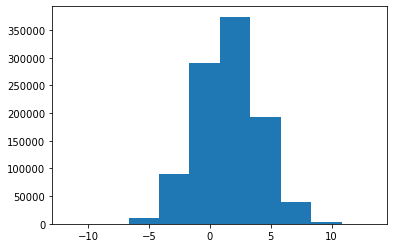

In [15]:
plt.hist(data["B"])

(array([ 99535., 100167.,  99582., 100294., 100428., 100141.,  99722.,
        100275.,  99746., 100110.]),
 array([ 5.00001692,  7.70001201, 10.4000071 , 13.10000219, 15.79999728,
        18.49999237, 21.19998746, 23.89998255, 26.59997764, 29.29997273,
        31.99996782]),
 <BarContainer object of 10 artists>)

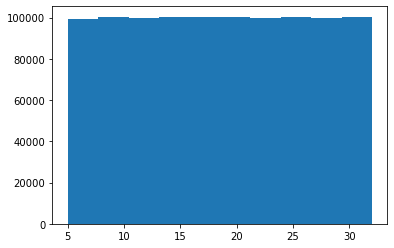

In [16]:
plt.hist(data["C"])

In [17]:
mainpath = "/home/bigdatafutura/notebooks/sesion 02/files"
filename = "Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)

data = pd.read_csv(fullpath)

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [22]:
new_data

,Column Name,A,B
42,State,0.043123,0.039478
43,Account Length,0.212347,0.780268
44,Area Code,-1.739622,0.257478
45,Phone,2.892177,0.240531
46,Int'l Plan,-0.310036,0.019574
47,VMail Plan,-0.822453,0.624096
48,VMail Message,-1.099463,0.943671
49,Day Mins,0.367811,0.907167
50,Day Calls,0.457752,0.984750
51,Day Charge,-1.674923,0.401275
